# NLP Assignment 1 (40% of grade): Sentiment Analysis from Tweets

This coursework will involve you implementing functions for a text classifier, which you will train to identify the **sentiment expressed in a text** in a dataset of approx. 27,000 entries, which will be split into a 80%/20% training/test split.

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question.

In [1]:
# csv reader
import csv
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
raw_data = []
train_data = []
test_data = []
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path,newline='', encoding='utf-8') as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))
           

def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    print(num_training_samples)
    print(num_samples-num_training_samples)
    for (text, label) in raw_data[:num_training_samples]:
        
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))

In [3]:
raw_data

[]

In [4]:
#load_data('sentiment-dataset.tsv')


In [5]:
#split_and_preprocess_data(0.8)

# Question 1: Input and Basic preprocessing (10 marks)

In [6]:
def parse_data_line(data_line):

    # tup = tup + tuple(text[2])
    # Should return a tuple of the label as just FAKE or REAL and the statement
    # e.g. (label, statement)
    return (data_line[1], data_line[2])

In [7]:
import re
import nltk
# Input: a string of one statement
def pre_process(text):
    nltk_tokens = re.findall(r'\b\w+\b', text)
    # print(nltk_tokens)
    # Should return a list of tokens
    # DESCRIBE YOUR METHOD IN WORDS
    return nltk_tokens

# Question 2: Basic Feature Extraction (20 marks)

In [8]:
global_feature_dict = {}  # A global dictionary of features

def to_feature_vector(tokens):
    # Initialize an empty feature dictionary for the current instance
    instance_feature_dict = {}

    # Iterate over tokens and create features
    for token in tokens:
        # Use binary feature values: 1 if the word is present, 0 otherwise
        instance_feature_dict[token] = 1

        # Update the global feature dictionary
        global_feature_dict[token] = global_feature_dict.get(token, 0) + 1

    # Return the feature dictionary for the current instance
    return instance_feature_dict


In [9]:
# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

In [10]:
#SklearnClassifier

In [11]:
#train_classifier(train_data)

# Question 3: Cross-validation (20 marks)

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def cross_validate(dataset, folds, classifier):
    results = []
    fold_size = int(len(dataset) / folds) + 1

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

    for i, (train_index, test_index) in enumerate(skf.split(dataset['text'], dataset['label'])):
        train_data, test_data = dataset.iloc[train_index], dataset.iloc[test_index]

        # Preprocess the text and create feature vectors
        train_features = [to_feature_vector(pre_process(text)) for text in train_data['text']]
        test_features = [to_feature_vector(pre_process(text)) for text in test_data['text']]

        # Extract labels
        train_labels = train_data['label']
        test_labels = test_data['label']

        # Train the classifier
        classifier.fit(train_features, train_labels)

        # Make predictions on the test set
        predictions = classifier.predict(test_features)

        # Evaluate and store the results
        accuracy = accuracy_score(test_labels, predictions)
        results.append(accuracy)
        print(f"Fold {i + 1}: Accuracy = {accuracy}")

    average_accuracy = sum(results) / len(results)
    print(f"Average Accuracy: {average_accuracy}")

    return results

# Example usage:
  # Replace YourClassifier with your actual classifier
#results = cross_validate(test_data, 10, classifier)


In [13]:

#texts = [item[0] for item in train_data]
#labels = [item[1] for item in train_data]

In [14]:
#labels

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming you have already defined the train_classifier and predict_labels functions

def cross_validate(dataset, folds):
    # Separate features (texts) and labels
    texts = [item[0] for item in dataset]
    labels = [item[1] for item in dataset]


    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

    # Initialize variables to store evaluation metrics
    cv_results = {'precision': [], 'recall': [], 'f1_score': [], 'accuracy': []}

    for i, (train_index, val_index) in enumerate(skf.split(texts, labels)):
        # Split the data into training and validation sets
        train_data = [(texts[idx], labels[idx]) for idx in train_index]
        val_data = [(texts[idx], labels[idx]) for idx in val_index]

        # Train the classifier
        classifier = train_classifier(train_data)

        # Make predictions on the validation set
        val_texts = [sample[0] for sample in val_data]
        val_labels = [sample[1] for sample in val_data]
        val_predictions = predict_labels(val_texts, classifier)
        global best_model
        best_accuracy = 0.0

        # Evaluate the classifier
        precision = precision_score(val_labels, val_predictions, average='weighted')
        recall = recall_score(val_labels, val_predictions, average='weighted')
        f1 = f1_score(val_labels, val_predictions, average='weighted')
        accuracy = accuracy_score(val_labels, val_predictions)
        
        if accuracy > best_accuracy:
            
            
            best_accuracy = accuracy
            print('best_accuracy: ',best_accuracy)
            best_model = classifier

        # Store the evaluation metrics for this fold
        cv_results['precision'].append(precision)
        cv_results['recall'].append(recall)
        cv_results['f1_score'].append(f1)
        cv_results['accuracy'].append(accuracy)

        print(f"Fold {i + 1}: Precision={precision:.4f}, Recall={recall:.4f}, F1 Score={f1:.4f}, Accuracy={accuracy:.4f}")

    # Calculate average scores for all folds
    for metric in cv_results:
        cv_results[metric] = sum(cv_results[metric]) / len(cv_results[metric])

    return cv_results

# Example usage:
#results = cross_validate(train_data, 10)
#print("Average Results:", results)


In [16]:
#best_model

In [17]:
def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return [classifier.classify(to_feature_vector(sample)) for sample in samples]

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    preprocessed_sample = pre_process(sample)
    feature_vector = to_feature_vector(preprocessed_sample)
    return classifier.classify(feature_vector)


In [18]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'sentiment-dataset.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path)

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 33540 rawData, 0 trainData, 0 testData
Preparing training and test data...
26832
6708
After split, 33540 rawData, 26832 trainData, 6708 testData
Training Samples: 
26832
Features: 
68410


In [19]:
cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


best_accuracy:  0.8338301043219076
Fold 1: Precision=0.8321, Recall=0.8338, F1 Score=0.8327, Accuracy=0.8338
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


best_accuracy:  0.8368107302533532
Fold 2: Precision=0.8363, Recall=0.8368, F1 Score=0.8366, Accuracy=0.8368
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


best_accuracy:  0.8386134923592993
Fold 3: Precision=0.8369, Recall=0.8386, F1 Score=0.8374, Accuracy=0.8386
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


best_accuracy:  0.8356317554975773
Fold 4: Precision=0.8335, Recall=0.8356, F1 Score=0.8336, Accuracy=0.8356
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


best_accuracy:  0.8486768542676109
Fold 5: Precision=0.8475, Recall=0.8487, F1 Score=0.8479, Accuracy=0.8487
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


best_accuracy:  0.8542676108833396
Fold 6: Precision=0.8526, Recall=0.8543, F1 Score=0.8527, Accuracy=0.8543
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


best_accuracy:  0.836749906820723
Fold 7: Precision=0.8349, Recall=0.8367, F1 Score=0.8353, Accuracy=0.8367
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


best_accuracy:  0.8501677226984719
Fold 8: Precision=0.8484, Recall=0.8502, F1 Score=0.8486, Accuracy=0.8502
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


best_accuracy:  0.8468132687290346
Fold 9: Precision=0.8455, Recall=0.8468, F1 Score=0.8459, Accuracy=0.8468
Training Classifier...


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


best_accuracy:  0.8423406634364518
Fold 10: Precision=0.8408, Recall=0.8423, F1 Score=0.8412, Accuracy=0.8423


{'precision': 0.8408628179028772,
 'recall': 0.8423902109267768,
 'f1_score': 0.841173930204401,
 'accuracy': 0.8423902109267768}

# Question 4: Error Analysis (20 marks)

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

def confusion_matrix_heatmap(val_data,y_test, preds, labels):
    """Function to plot a confusion matrix"""
    cm = metrics.confusion_matrix(y_test, preds, labels=labels)
            # Log false positives and false negatives
    false_positives.append([val_data[idx] for idx in range(len(val_data)) if preds[idx] == 'positive' and val_data[idx][1] == 'negative'])
    false_negatives.append([val_data[idx] for idx in range(len(val_data)) if preds[idx] == 'negative' and val_data[idx][1] == 'positive'])

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticklabels(labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim()  # Discover the values for bottom and top
    b += 0.5  # Add 0.5 to the bottom
    t -= 0.5  # Subtract 0.5 from the top
    plt.ylim(b, t)  # Update the ylim(bottom, top) values
    plt.show()  # Display the plot
    plt.show()

In [21]:
test_texts = [sample[0] for sample in test_data]
test_labels = [sample[1] for sample in test_data]
test_predictions = predict_labels(test_texts, best_model)
labels = ['positive', 'negative']


In [22]:
#test_labels

In [23]:

false_positives = []
false_negatives = []
def analyze_errors(texts,ytest, ypred, labels):
    false_positives = [i for i in range(len(ytest)) if ypred[i] == 'positive' and ytest[i] == 'negative']
    false_negatives = [i for i in range(len(ytest)) if ypred[i] == 'negative' and ytest[i] == 'positive']

    print("False Positives:")
    for idx in false_positives:
        cleaned_string = re.sub(r'[^a-zA-Z\s]', '', str(texts[idx]))

        print(f"Text: {cleaned_string}, Predicted: {ypred[idx]}, True: {ytest[idx]}")

    print("\nFalse Negatives:")
    for idx in false_negatives:
        cleaned_string = re.sub(r'[^a-zA-Z\s]', '', str(texts[idx]))
        print(f"Text: {cleaned_string}, Predicted: {ypred[idx]}, True: {ytest[idx]}")

# Example usage:
# Assuming you have ytest and ypred
analyze_errors(test_texts,test_labels, test_predictions, labels)

False Positives:
Text: Tony  Blair  said  God  will  judge  me  over  Iraq  Here  s  another  biblical  truism  You  we  reap  what  you  sow  https  t  co  EVpntoZd , Predicted: positive, True: negative
Text: That  time  Snowden  arrived  in  Russia  and  the  FSB  s  Olga  Kostina  was  waiting  at  airport  to  facilitate  his  defec  https  t  co  GXELmoCKp , Predicted: positive, True: negative
Text: Activists  demand  release  of  Jharkhand  tribal  leader  New  Delhi  Nov    IANS  Condemning  the  arrest  woman  trib  http  t  co  LZlgbNW , Predicted: positive, True: negative
Text: Really  hope  Chelsea  start  Baba  instead  of  Ivanovic  on  Saturday  he  s  literally  aged  about    years  over  the  summer , Predicted: positive, True: negative
Text: I  haven  t  seen  my  best  friend  since  the  Cubs  parade  and  we  only  live  less  than    minutes  away , Predicted: positive, True: negative
Text: Eamonn  Holmes  has  dropped  the  biggest  hint  yet  that  he  s  going 

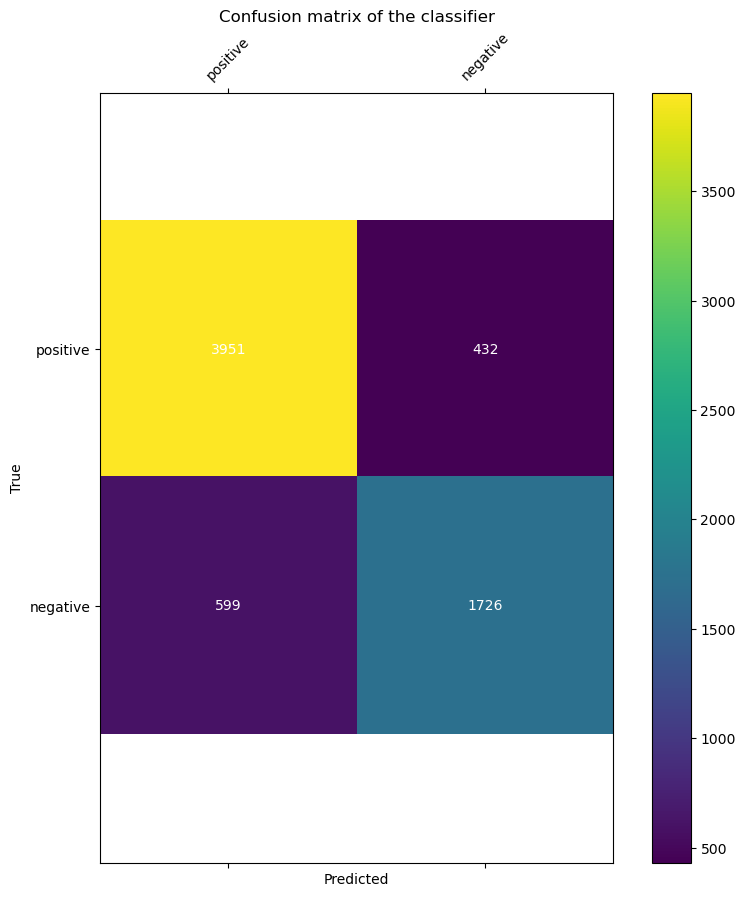

In [24]:
confusion_matrix_heatmap(test_data,test_labels, test_predictions, labels)

# Questions 5: Optimising pre-processing and feature extraction (30 marks)

**Note:** it is advisable to implement question 5 in a separate notebook where you further develop the pre-processing and feature extraction functions you implemented above.

In [25]:
# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = False  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])